In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as ptch

from utils import Rect, minkowski_sum, Vorobyev_sim, ODA_sim

In [2]:
# generovanie vzorky 1000 realizacii nahodnej mnoziny
rects = [Rect() for _ in range(1000)]

# vypocet niektorych charakteristik tykajucich sa nahodnej mnoziny
print(f"E(x): {np.mean([r.x for r in rects])}")
print(f"E(y): {np.mean([r.y for r in rects])}")
print(f"E(xy): {np.mean([r.x*r.y for r in rects])}")

E(x): 0.6454706044880968
E(y): 0.6325783434998971
E(xy): 0.3240242673575265


In [3]:
# vypocet (empirickej) Aummanovej strednej hodnoty
aumann = minkowski_sum(polygons=[rect.points for rect in rects])

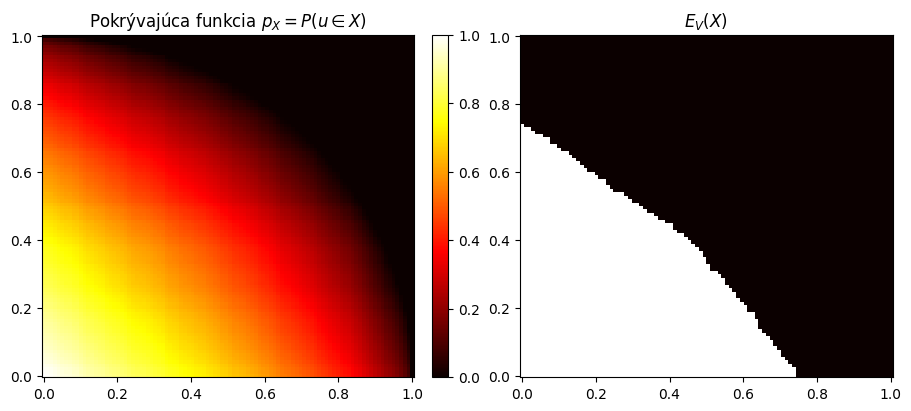

In [6]:
# vypocet (empirickej) Vorobyevovej strednej hodnoty
# POZOR - trva 3 minuty
Vorobyev_sim(rects, None, 100, 100, (0,1), (0,1))

In [4]:
# zadefinovanie utvaru (teoretickej) Vorobyevovej strednej hodnoty
# postup (ako sme prisli k t=0.46) nacrtnuty v praci
# potrebne pre vykreslenie vystupu na konci notebooku

t = 0.45982858
vorobyev_xp = np.linspace(0,np.cos(np.pi*t/2),100)
vorobyev_yp = np.sin(-t * np.pi/2 + np.arccos(vorobyev_xp))
vorobyev_xp = np.concatenate([[vorobyev_xp[-1],0], vorobyev_xp])
vorobyev_yp = np.concatenate([[0,0],vorobyev_yp])
vorobyev = np.array(list(zip(vorobyev_xp,vorobyev_yp)))

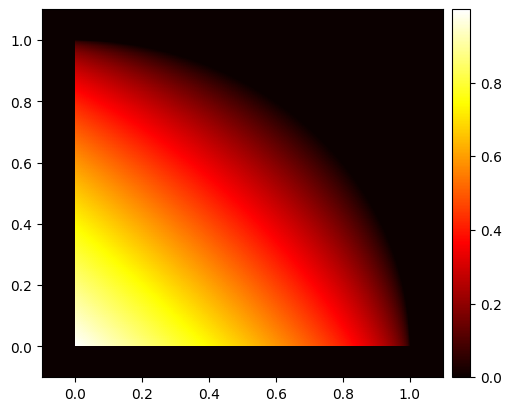

In [5]:
# vykreslenie teoretickej pokryvajucej funkcie
# p(x,y) = 2/pi * (arccos(x) - arcsin(y))
 
xx = np.linspace(-0.1,1.1,1000)
yy = np.linspace(-0.1,1.1,1000)
f_xy = np.zeros((1000,1000))
for i,x in enumerate(xx):
    for j,y in enumerate(yy):
        if x < 0 or y <0 or x**2 + y**2 > 1:
            f_xy[i,j] = 0
        else:
            f_xy[i,j] = max(0,2/np.pi * (np.arccos(x) - np.arcsin(y)))

fig, ax = plt.subplots(1,2, figsize=(5,4), gridspec_kw={'width_ratios': [44,2]}, constrained_layout=True)
a0 = ax[0].pcolormesh(xx,yy,f_xy.T,cmap="hot")
ax[1] = plt.colorbar(a0, cax=ax[1])
plt.show()

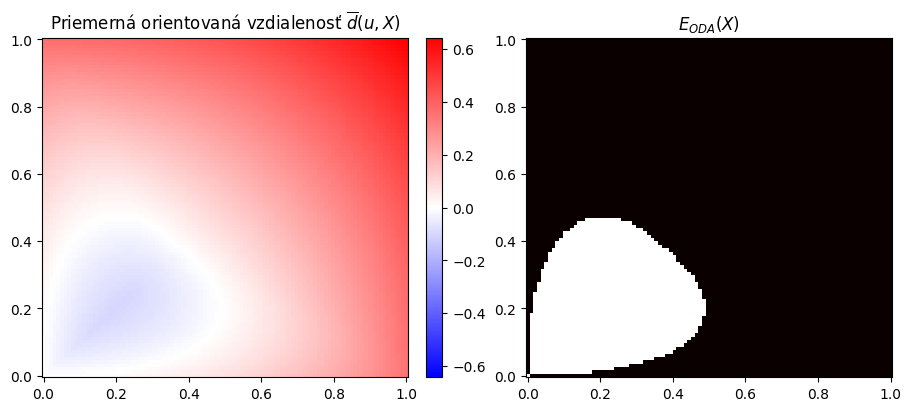

In [14]:
# vypocet (empirickej) ODA strednej hodnoty (rozlisenie 100x100)
# vypocet trva cca 1 minutu
ODA = ODA_sim(rects, None, 100, 100, (0,1), (0,1))

In [18]:
# nacitanie lepsieho rozlisenia - pre zobrazenie vystupu v dalsej bunke
with open("files/ODA_obdlzniky.txt", "rb") as f:
    ODA_ = pickle.load(f)

xp = np.linspace(0,0.5,500)
yp = np.linspace(0,0.5,500)
ODA_xp = np.array(np.meshgrid(xp,yp)[0])[ODA_]
ODA_yp = np.array(np.meshgrid(xp,yp)[1])[ODA_]

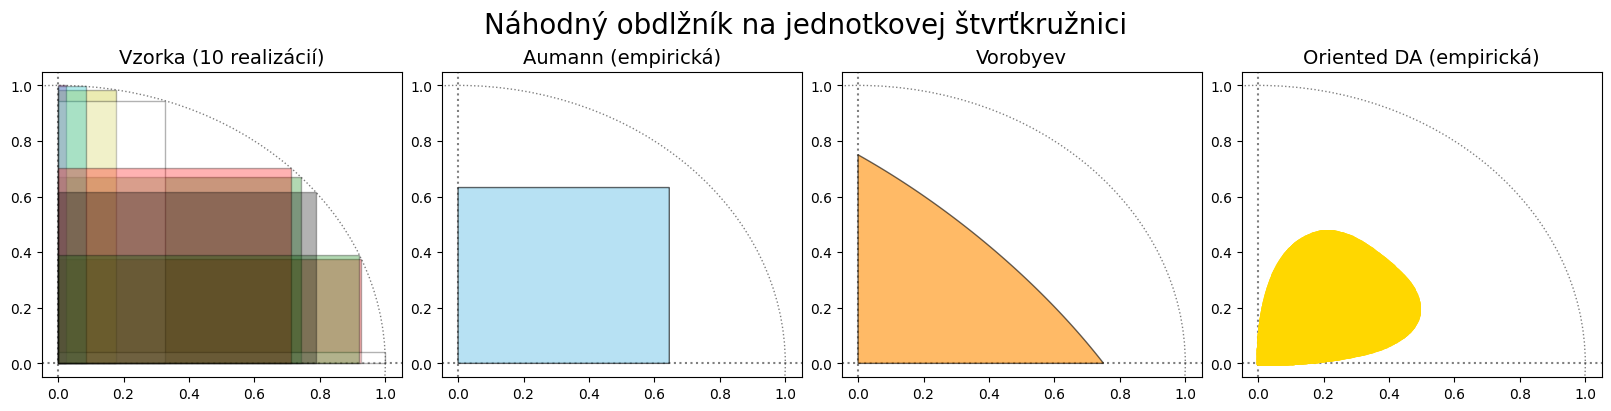

In [19]:
# vystup - ukazka realizacii a strednych hodnot
fig,ax = plt.subplots(1,4,figsize=(16,4), constrained_layout=True)
plt.setp(ax, xlim=(-0.05,1.05), ylim=(-0.05,1.05))
fig.suptitle("Náhodný obdlžník na jednotkovej štvrťkružnici", fontsize=20)

for a in ax:
    a.add_patch(ptch.Circle([0,0], 1, fill=False, ec="black", zorder=0, ls=":", alpha=0.5))
    a.axhline(zorder=0, color="black", alpha=0.5, ls=":")
    a.axvline(zorder=0, color="black", alpha=0.5, ls=":")

for rect in rects[:10]:
    ax[0].add_patch(ptch.Rectangle([0,0],rect.x,rect.y, ec="black", fc=np.random.choice(list("bgrcmykw")), alpha=0.3))
ax[1].add_patch(ptch.Polygon(aumann, fc="skyblue", ec="black", alpha=0.6))
ax[2].add_patch(ptch.Polygon(vorobyev, fc="darkorange", ec="black", alpha=0.6))
ax[3].scatter(ODA_xp, ODA_yp, s=1, marker="s", c="gold")

ax[0].set_title("Vzorka (10 realizácií)", fontsize=14)
ax[1].set_title("Aumann (empirická)", fontsize=14)
ax[2].set_title("Vorobyev", fontsize=14)
ax[3].set_title("Oriented DA (empirická)", fontsize=14)

plt.show()

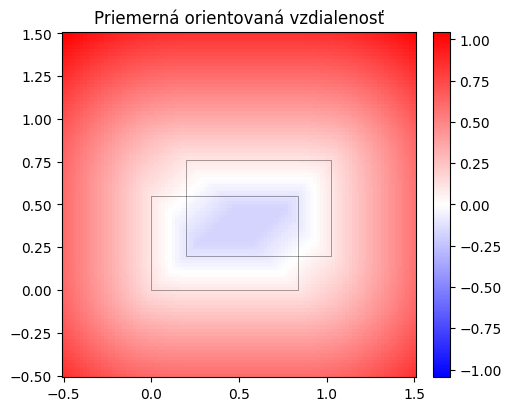

In [13]:
# ilustracny obrazok v praci - orientovana vzdialenost
a = Rect()
b = Rect()
polygons=[a,b]

xlim, ylim = (-0.5,1.5), (-0.5,1.5)
nx, ny=100,100

xx = np.linspace(*xlim,nx)
yy = np.linspace(*ylim,ny)
avg_dist = np.zeros((nx, ny))
for i,x in enumerate(xx):
    for j,y in enumerate(yy):
        avg_dist[i,j] = (a.oriented_dist(x,y) + b.oriented_dist(x-0.2,y-0.2))/2


cmaps_extrem = max(avg_dist.max(), -avg_dist.min())
fig, ax = plt.subplots(1,2, figsize=(5,4), gridspec_kw={'width_ratios': [44,2]}, constrained_layout=True)
a0 = ax[0].pcolormesh(xx,yy,avg_dist.T,cmap="bwr", vmin=-cmaps_extrem, vmax=cmaps_extrem)
ax[0].add_patch(ptch.Rectangle([0,0],a.x,a.y, fill=False, ec="black", lw=0.5, alpha=0.5))
ax[0].add_patch(ptch.Rectangle([0.2,0.2],b.x,b.y, fill=False, ec="black", lw=0.5, alpha=0.5))
ax[0].set_title("Priemerná orientovaná vzdialenosť")
plt.colorbar(a0, cax=ax[1])
plt.show()